Using CPU for training


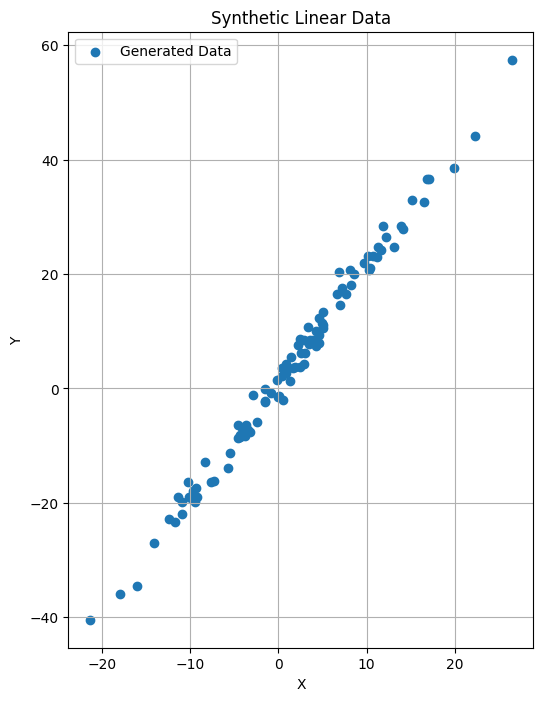

In [29]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

if torch.cuda.is_available():
    device="cuda"
    print("Using CUDA GPU for training")
else:
    device="cpu"
    print("Using CPU for training")

X_true_w=2.0
X_true_b=1.0

num_samples=100
X=torch.randn(num_samples,1)*10
y=X_true_w*X+X_true_b+torch.randn(num_samples,1)*2

X=X.to(device)
y=y.to(device)

plt.figure(figsize=(6,8))
plt.scatter(X.cpu().numpy(),y.cpu().numpy(),label='Generated Data')
plt.title('Synthetic Linear Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel,self).__init__()
        self.linear=nn.Linear(in_features=1,out_features=1)
    def forward(self,x):
        return self.linear(x)

model=LinearRegressionModel().to(device)
print(model)
print(f"Initial weights: {model.linear.weight.item():.4f}")
print(f"Initial bias: {model.linear.bias.item():.4f}")


LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
Initial weights: -0.8921
Initial bias: 0.5928


In [31]:
# class CustomLinearRegressionModel(nn.Module):
#     def __init__(self):
#         input_features=1
#         output_features=1
#         super(CustomLinearRegressionModel,self).__init__()
#         self.weight=nn.Parameter(torch.randn(input_features,output_features))
#         self.bias=nn.Parameter(torch.randn(output_features))
#     def forward(self,x):
#         return x @ self.weight + self.bias

# model_custom=CustomLinearRegressionModel().to(device)
# print(model_custom)
# print(f"Custom model initial weights: {model_custom.weight.item():.4f}")
# print(f"Custom model initial bias: {model_custom.bias.item():.4f}")

In [32]:
criterion=nn.MSELoss()
learning_rate=0.001
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)
print(f"Loss Function: {criterion}")
print(f"Optimizer: {optimizer}")
print(list(model.parameters()))

Loss Function: MSELoss()
Optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)
[Parameter containing:
tensor([[-0.8921]], requires_grad=True), Parameter containing:
tensor([0.5928], requires_grad=True)]


In [33]:
num_epochs=1000
loss_history=[]
print("Starting Training")
for epoch in range(num_epochs):
    y_pred=model(X)

    loss=criterion(y_pred,y)

    optimizer.zero_grad()
    loss.backward()

    optimizer.step()

    loss_history.append(loss.item())

    if (epoch+1)%10==0:
        current_w=model.linear.weight.item()
        current_b=model.linear.bias.item()
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, '
              f'W: {current_w:.4f}, B: {current_b:.4f}')
print("\nTraining finished!")

Starting Training
Epoch [10/1000], Loss: 30.4136, W: 1.5641, B: 0.6414
Epoch [20/1000], Loss: 4.0402, W: 1.9625, B: 0.6553
Epoch [30/1000], Loss: 3.3410, W: 2.0271, B: 0.6634
Epoch [40/1000], Loss: 3.3178, W: 2.0374, B: 0.6705
Epoch [50/1000], Loss: 3.3127, W: 2.0390, B: 0.6774
Epoch [60/1000], Loss: 3.3082, W: 2.0392, B: 0.6840
Epoch [70/1000], Loss: 3.3040, W: 2.0391, B: 0.6906
Epoch [80/1000], Loss: 3.2998, W: 2.0390, B: 0.6970
Epoch [90/1000], Loss: 3.2959, W: 2.0389, B: 0.7033
Epoch [100/1000], Loss: 3.2920, W: 2.0388, B: 0.7095
Epoch [110/1000], Loss: 3.2884, W: 2.0387, B: 0.7155
Epoch [120/1000], Loss: 3.2848, W: 2.0386, B: 0.7214
Epoch [130/1000], Loss: 3.2814, W: 2.0385, B: 0.7273
Epoch [140/1000], Loss: 3.2782, W: 2.0384, B: 0.7330
Epoch [150/1000], Loss: 3.2750, W: 2.0383, B: 0.7386
Epoch [160/1000], Loss: 3.2720, W: 2.0382, B: 0.7440
Epoch [170/1000], Loss: 3.2691, W: 2.0382, B: 0.7494
Epoch [180/1000], Loss: 3.2663, W: 2.0381, B: 0.7547
Epoch [190/1000], Loss: 3.2636, W: 2

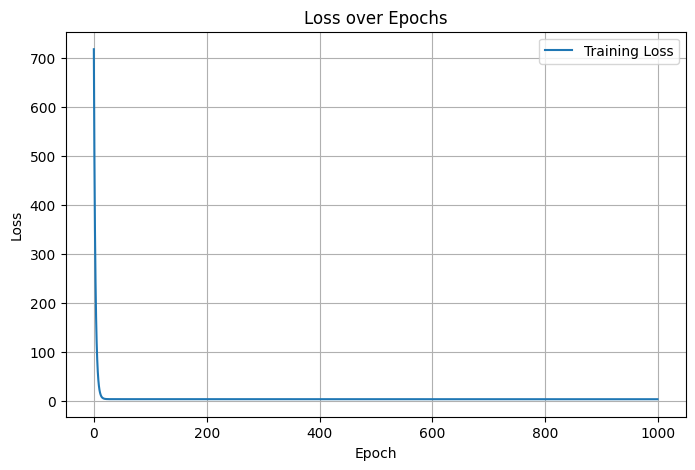

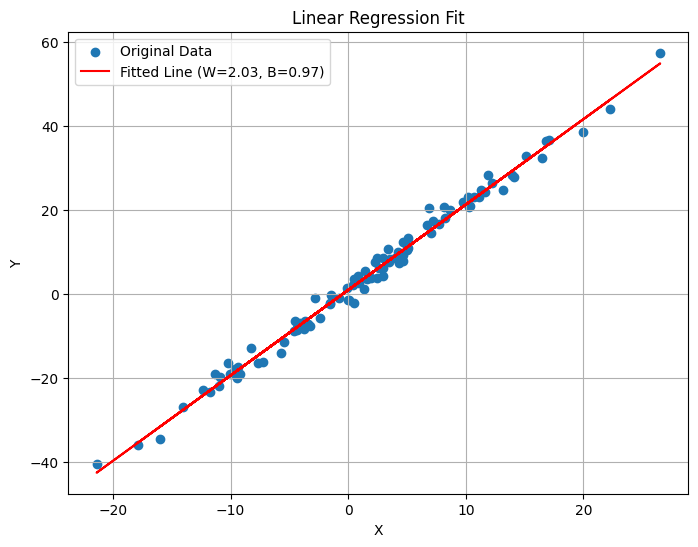

Predictions for new X values:
[  5.  15. -10.] -> [ 11.140521  31.48543  -19.37684 ]


In [34]:
plt.figure(figsize=(8,5))
plt.plot(loss_history,label='Training Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

model.eval()
with torch.no_grad():
    predicted=model(X).cpu().numpy()

plt.figure(figsize=(8, 6))
plt.scatter(X.cpu().numpy(), y.cpu().numpy(), label='Original Data')
plt.plot(X.cpu().numpy(), predicted, color='red', label=f'Fitted Line (W={model.linear.weight.item():.2f}, B={model.linear.bias.item():.2f})')
plt.title('Linear Regression Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

new_X = torch.tensor([[5.0], [15.0], [-10.0]]).to(device)
with torch.no_grad():
    new_predictions = model(new_X).cpu().numpy()
print(f"Predictions for new X values:\n{new_X.cpu().numpy().flatten()} -> {new_predictions.flatten()}")
